In [1]:
# In this notebook, I follow techniques from kaggle.com/SHYAMBHUMUKHERJEE.
# Used this as a guidebook to advanced nlp.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("C:/Users/user/OneDrive/Desktop/nlp_twitter/nlp-getting-started/nlp_twitter_train.csv")
test = pd.read_csv("C:/Users/user/OneDrive/Desktop/nlp_twitter/nlp-getting-started/nlp_twitter_test.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [6]:
train = train.drop(columns = ['id'], axis = 1)
test = test.drop(columns = ['id'], axis = 1)

In [7]:
train.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


0    4342
1    3271
Name: target, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


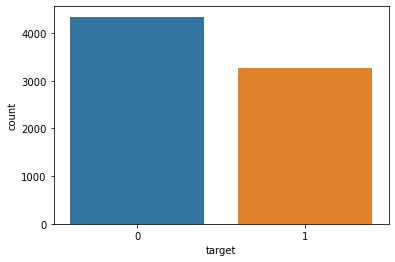

In [8]:
sns.countplot(train['target'])
print(train['target'].value_counts())

In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordLemm = WordNetLemmatizer()

In [10]:
train = train.fillna('')
test = test.fillna('')

# Keyword Engineering

In [11]:
# list out all keywords
keywords = list(train['keyword'].unique())
keywords

['',
 'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',

In [12]:
# remove %20 from keyword
import re
def CleanedKeyword(x):
    try:
        x = x.split("%20")
        x = " ".join(x)
        return x
    except:
        return x

In [13]:
train['keyword'] = train['keyword'].apply(lambda x: CleanedKeyword(x))
test['keyword'] = test['keyword'].apply(lambda x: CleanedKeyword(x))

In [14]:
print(train['keyword'].unique())
print(test['keyword'].unique())

['' 'ablaze' 'accident' 'aftershock' 'airplane accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew up' 'blight' 'blizzard'
 'blood' 'bloody' 'blown up' 'body bag' 'body bagging' 'body bags' 'bomb'
 'bombed' 'bombing' 'bridge collapse' 'buildings burning'
 'buildings on fire' 'burned' 'burning' 'burning buildings' 'bush fires'
 'casualties' 'casualty' 'catastrophe' 'catastrophic' 'chemical emergency'
 'cliff fall' 'collapse' 'collapsed' 'collide' 'collided' 'collision'
 'crash' 'crashed' 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger'
 'dead' 'death' 'deaths' 'debris' 'deluge' 'deluged' 'demolish'
 'demolished' 'demolition' 'derail' 'derailed' 'derailment' 'desolate'
 'desolation' 'destroy' 'destroyed' 'destruction' 'detonate' 'detonation'
 'devastated' 'devastation' 'disaster' 'displaced' 'drought' 'drown'
 'drowned' 'drowni

# Clean text

In [15]:
from nltk.corpus import stopwords
import string
from bs4 import BeautifulSoup
def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    if text:
        text = ' '.join(text.split('.'))
        text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z0-9]', ' ', text.strip().lower())).strip()
        text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
        text = [word for word in text.split() if word not in forbidden_words]
        return text
    return []
#clean data
#this following cleaning is taken from https://www.kaggle.com/nxhong93/tweet-predict1
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '\u3000', '\u202f',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

mispell_dict = {"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"couldnt" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"doesnt" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"havent" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"shouldnt" : "should not",
"that's" : "that is",
"thats" : "that is",
"there's" : "there is",
"theres" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"theyre":  "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"}

puncts = puncts + list(string.punctuation)

def clean_text(x):
    x = str(x).replace("\n","")
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
    return x


def clean_numbers(x):
    x = re.sub('\d+', ' ', x)
    return x


def replace_typical_misspell(text):
    mispellings_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))

    def replace(match):
        return mispell_dict[match.group(0)]

    return mispellings_re.sub(replace, text)

def remove_space(string):
    string = BeautifulSoup(string).text.strip().lower()
    string = re.sub(r'((http)\S+)', 'http', string)
    string = re.sub(r'\s+', ' ', string)
    return string


def clean_data(df, columns: list):
    
    for col in columns:
        df[col] = df[col].apply(lambda x: remove_space(x).lower())        
        df[col] = df[col].apply(lambda x: replace_typical_misspell(x))
        df[col] = df[col].apply(lambda x: clean_text(x))
        
    return df

# Add cleaned data to data set

In [16]:
# before
train.head()

,keyword,location,text,target
0,,,Our Deeds are the Reason of this #earthquake M...,1
1,,,Forest fire near La Ronge Sask. Canada,1
2,,,All residents asked to 'shelter in place' are ...,1
3,,,"13,000 people receive #wildfires evacuation or...",1
4,,,Just got sent this photo from Ruby #Alaska as ...,1


In [17]:
for col in ['location','text']:
    train[col] = train[col].apply(lambda x: ' '.join(text_cleaning(x)))
    test[col] = test[col].apply(lambda x: ' '.join(text_cleaning(x)))
train = clean_data(train,['keyword','text'])
test = clean_data(test,['keyword','text'])

In [18]:
# after
train.head()

,keyword,location,text,target
0,,,deeds reason earthquake may allah forgive us,1
1,,,forest fire near la ronge sask canada,1
2,,,residents asked shelter place notified officer...,1
3,,,13 000 people receive wildfires evacuation ord...,1
4,,,got sent photo ruby alaska smoke wildfires pou...,1


In [19]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [20]:
# detect location
def DetectLocation(text):
    doc = nlp(text)
    entitles = []
    for ent in doc.ents:
        entitles.append(ent)
    if len(entitles) > 0:
        return 1
    return 0

In [21]:
train['original_location'] = train['location'].apply(lambda x: DetectLocation(x))
test['original_location'] = test['location'].apply(lambda x: DetectLocation(x))

In [22]:
train[train['location'] != '']

,keyword,location,text,target,original_location
31,ablaze,birmingham,bbcmtd wholesale markets ablaze http co lhyxeo...,1,0
32,ablaze,est september 2012 bristol,always try bring heavy metal rt http co yao1e0...,0,1
33,ablaze,africa,africanbaze breaking news nigeria flag set abl...,1,0
34,ablaze,philadelphia pa,crying set ablaze,0,1
35,ablaze,london uk,plus side look sky last night ablaze http co q...,0,1
...,...,...,...,...,...
7575,wrecked,tn,bright side wrecked http co uea0txrhys,0,0
7577,wrecked,newcastleupontyne uk,widda16 gone relax thought wife wrecked cake g...,0,1
7579,wrecked,vancouver canada,three days work pretty much wrecked hahaha sho...,0,1
7580,wrecked,london,fx forex trading cramer iger 3 words wrecked d...,0,1


In [23]:
list(train['location'].unique())

['',
 'birmingham',
 'est september 2012 bristol',
 'africa',
 'philadelphia pa',
 'london uk',
 'pretoria',
 'world wide',
 'paranaque city',
 'live webcam',
 'milky way',
 'greensboro north carolina',
 'england',
 'sheffield township ohio',
 'india',
 'barbados',
 'anaheim',
 'abuja',
 'usa',
 'south africa',
 'sao paulo brazil',
 'hollywoodland',
 'edmonton alberta treaty 6',
 'inang pamantasan',
 'twitter lockout progress',
 'concord ca',
 'calgary ab',
 'san francisco',
 'clvlnd',
 'nashville tn',
 'santa clara ca',
 'uk',
 'st louis mo',
 'walker county alabama',
 'australia',
 'north carolina',
 'norf carolina',
 'san mateo county ca',
 'njoro kenya',
 'sister bedroom',
 'arlington tx',
 'south bloomfield oh',
 'new hanover county nc',
 'maldives',
 'manchester nh',
 'wilmington nc',
 'global',
 'alberta sask montana',
 'charlotte',
 'baton rouge la',
 'hagerstown md',
 'gloucestershire uk',
 'nairobi kenya',
 'instagram heyimginog',
 '304',
 'switzerland',
 'us',
 'somewhere kn

In [24]:
spam_locations = ['place','room','home','somewhere','nowhere','everywhere','location',
                  'dope','kidding','moon','wherever','dimension','world','fvck','fuck','beside']
def is_location_spammy(text):
    for word in spam_locations:
        if word in text:
            return 1
    return 0

In [25]:
train['Is_location_spam'] = train['location'].apply(lambda x: is_location_spammy(x))
test['Is_location_spam'] = test['location'].apply(lambda x: is_location_spammy(x))

In [26]:
train.head()

,keyword,location,text,target,original_location,Is_location_spam
0,,,deeds reason earthquake may allah forgive us,1,0,0
1,,,forest fire near la ronge sask canada,1,0,0
2,,,residents asked shelter place notified officer...,1,0,0
3,,,13 000 people receive wildfires evacuation ord...,1,0,0
4,,,got sent photo ruby alaska smoke wildfires pou...,1,0,0


In [27]:
def digit_counter(text):
    """detects any digit in any token and counts
       once par token."""
    sum_number = 0
    doc = nlp(text)
    for token in doc:
        sum_number += bool(re.search(r'\d', token.text))*1
    return sum_number 

In [28]:
train['digit_count_location'] = train['location'].apply(lambda x: digit_counter(x))
test['digit_count_location'] = test['location'].apply(lambda x: digit_counter(x))

In [29]:
train.head()

,keyword,location,text,target,original_location,Is_location_spam,digit_count_location
0,,,deeds reason earthquake may allah forgive us,1,0,0,0
1,,,forest fire near la ronge sask canada,1,0,0,0
2,,,residents asked shelter place notified officer...,1,0,0,0
3,,,13 000 people receive wildfires evacuation ord...,1,0,0,0
4,,,got sent photo ruby alaska smoke wildfires pou...,1,0,0,0


In [30]:
# find different frequent words occuring in disaster tweets vs non-disaster tweets
disaster_tweets =' '.join(train[train['target'] == 1]['text'].tolist())
non_disaster_tweets = ' '.join(train[train['target'] == 0]['text'].tolist())

In [31]:
import nltk
def return_top_words(text,words = 10):
    allWords = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

In [32]:
top_50_disaster_words = return_top_words(disaster_tweets,50)
top_50_nondisaster_words = return_top_words(non_disaster_tweets,50)

In [33]:
top_50_disaster_words

['co',
 'http',
 'fire',
 'news',
 'amp',
 'disaster',
 'via',
 'california',
 'suicide',
 'police',
 'people',
 '2',
 'killed',
 'like',
 'hiroshima',
 'storm',
 'fires',
 'crash',
 'families',
 'train',
 'emergency',
 'bomb',
 'buildings',
 'two',
 'nuclear',
 'mh370',
 'attack',
 'video',
 'wildfire',
 'accident',
 'bombing',
 'old',
 'get',
 'one',
 '1',
 'dead',
 'northern',
 'burning',
 'legionnaires',
 'car',
 'bomber',
 'pm',
 'u',
 'war',
 'year',
 'homes',
 'typhoon',
 'new',
 'still',
 'obama']

In [34]:
top_50_nondisaster_words

['co',
 'http',
 'like',
 'amp',
 'new',
 'get',
 'one',
 'body',
 '2',
 'would',
 'via',
 'video',
 'people',
 'got',
 'love',
 'day',
 'know',
 'time',
 'back',
 '3',
 'full',
 'see',
 'emergency',
 'us',
 'going',
 'youtube',
 'u',
 'let',
 'still',
 'gt',
 'fire',
 'go',
 'want',
 'good',
 'man',
 'think',
 'rt',
 'world',
 'na',
 'lol',
 'life',
 'first',
 'news',
 'way',
 'burning',
 'last',
 'make',
 'best',
 '5',
 'really']

In [35]:
top_200_disaster_words = return_top_words(disaster_tweets,400)
top_200_nondisaster_words = return_top_words(non_disaster_tweets,400)
top_disaster_exclusive = list(set(top_200_disaster_words).difference(set(top_200_nondisaster_words)))
top_nondisaster_exclusive = list(set(top_200_nondisaster_words).difference(set(top_200_disaster_words)))

In [36]:
top_disaster_exclusive

['village',
 'bomber',
 'media',
 'trains',
 'rainstorm',
 'charged',
 'kill',
 'rain',
 'america',
 'crisis',
 'national',
 'caused',
 'horror',
 'massacre',
 'declaration',
 'least',
 'possible',
 'water',
 'fight',
 'warning',
 'rescuers',
 'saudi',
 'helicopter',
 'trench',
 'evacuation',
 'land',
 'north',
 'crashed',
 'collided',
 'rd',
 'issued',
 'air',
 'east',
 'boy',
 'murderer',
 'bodies',
 'weather',
 'terrorism',
 'update',
 'hiroshima',
 'shot',
 'due',
 'pkk',
 'temple',
 'severe',
 'south',
 'northern',
 'reunion',
 'pm',
 'airplane',
 '16',
 'earthquake',
 'past',
 'sinkhole',
 'flash',
 'fatal',
 'hurricane',
 'casualties',
 'reuters',
 'affected',
 'street',
 'youth',
 'violent',
 'picking',
 'japan',
 'hostage',
 'hailstorm',
 'india',
 'manslaughter',
 'says',
 'three',
 'calgary',
 'b',
 'use',
 'suspect',
 'aircraft',
 'memories',
 'refugio',
 'traffic',
 'security',
 'island',
 'outrage',
 'american',
 'cyclone',
 'bigger',
 'migrants',
 'famine',
 'st',
 'arso

In [37]:
top_nondisaster_exclusive

['cross',
 'beautiful',
 'remember',
 'something',
 'x',
 'bc',
 'pick',
 'keep',
 'horrible',
 'nothing',
 'thanks',
 'loud',
 'wrecked',
 'sorry',
 'exploded',
 'policy',
 'mudslide',
 'thing',
 'screaming',
 'girl',
 'find',
 'making',
 'liked',
 'yet',
 'destruction',
 'survive',
 'away',
 'tv',
 'upheaval',
 'wait',
 'heard',
 'whirlwind',
 'jobs',
 'top',
 'explode',
 'smoke',
 'spot',
 'maybe',
 'everything',
 'fall',
 'always',
 'danger',
 'big',
 'blew',
 'blight',
 'obliterated',
 'game',
 'makes',
 'finally',
 'really',
 'great',
 'desolation',
 'things',
 'happy',
 'summer',
 'phone',
 'save',
 'panicking',
 'deluge',
 'fear',
 'die',
 'sure',
 'online',
 'change',
 'guy',
 'crushed',
 'yeah',
 'ebay',
 'chemical',
 'windstorm',
 'collide',
 'content',
 'full',
 'quarantined',
 'traumatised',
 'data',
 'anything',
 'sirens',
 'song',
 'pretty',
 'low',
 'part',
 'ass',
 'cool',
 'book',
 'side',
 'im',
 'electrocute',
 'bagging',
 'real',
 'sinking',
 'bags',
 'mayhem',
 'b

In [38]:
total_vocab = top_disaster_exclusive + top_nondisaster_exclusive

In [39]:
for word in total_vocab:
    train['Is_'+word+'_present'] = train['text'].apply(lambda x: (word in x)*1)
    test['Is_'+word+'_present'] = test['text'].apply(lambda x: (word in x)*1)

In [40]:
train.head()

,keyword,location,text,target,original_location,Is_location_spam,digit_count_location,Is_village_present,Is_bomber_present,Is_media_present,...,Is_sound_present,Is_better_present,Is_trying_present,Is_thought_present,Is_stand_present,Is_head_present,Is_long_present,Is_detonate_present,Is_bleeding_present,Is_went_present
0,,,deeds reason earthquake may allah forgive us,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,,,forest fire near la ronge sask canada,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,,,residents asked shelter place notified officer...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,,,13 000 people receive wildfires evacuation ord...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,,,got sent photo ruby alaska smoke wildfires pou...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         max_features = 5000,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(train['text'])
X_test_tfidf = tf_idf.transform(test['text'])
tf_kw = TfidfVectorizer(ngram_range = (1,2),
                        binary = True,
                        max_features = 1500,
                        smooth_idf = False)
kw_train_tfidf = tf_kw.fit_transform(train['keyword'])
kw_test_tfidf = tf_kw.transform(test['keyword'])
tf_location = TfidfVectorizer(ngram_range = (1,2),
                              binary = True,
                              max_features = 1500,
                              smooth_idf = False)
location_train_tfidf = tf_location.fit_transform(train['location'])
location_test_tfidf = tf_location.transform(test['location'])

In [42]:
train = pd.concat([train,pd.DataFrame(X_train_tfidf.toarray(),
                                                columns = ['text_contains_'+ str(text) for text in tf_idf.get_feature_names()]),
                        pd.DataFrame(kw_train_tfidf.toarray(),
                                     columns = ['keyword_contains_'+str(text) for text in tf_kw.get_feature_names()]),
                        pd.DataFrame(location_train_tfidf.toarray(),
                                     columns = ['location_contains_'+str(text) for text in tf_location.get_feature_names()])],axis = 1)
test = pd.concat([test,pd.DataFrame(X_test_tfidf.toarray(),
                                              columns = ['text_contains_'+ str(text) for text in tf_idf.get_feature_names()]),
                       pd.DataFrame(kw_test_tfidf.toarray(),
                                    columns = ['keyword_contains_'+str(text) for text in tf_kw.get_feature_names()]),
                       pd.DataFrame(location_test_tfidf.toarray(),
                                    columns = ['location_contains_'+str(text) for text in tf_location.get_feature_names()])],axis = 1)

In [43]:
for col in train.columns:
    if col == 'text':
        print(train[col].describe())

count                                                  7613
unique                                                 7488
top       11 year old boy charged manslaughter toddler r...
freq                                                     10
Name: text, dtype: object


In [44]:
def create_vec(dataframe):
    texts = dataframe['text'].tolist()
    vectors = []
    for doc in nlp.pipe(texts):
        vectors.append(list(doc.vector))
    df = pd.DataFrame(vectors,columns = ['vec_'+str(i) for i in range(96)])
    return df
vec_train = create_vec(train)
vec_test = create_vec(test)
train = pd.concat([train,vec_train],axis = 1)
test = pd.concat([test,vec_test],axis = 1)

In [45]:
train = train.drop(['keyword','location','text'],axis = 1)
test = test.drop(['keyword','location','text'],axis = 1)

In [46]:
X_train = train.drop('target',axis = 1)
Y_train = train['target']
print('target' in test.columns)

False


In [47]:
X_train = X_train.loc[:,~X_train.columns.duplicated()].copy()

In [48]:
len(train.columns)

7378

In [49]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report
forest = rfc(n_estimators = 128,max_depth = 8,min_samples_split = 15,
             class_weight = {0:1,1:1.6},oob_score = True)
forest.fit(X_train,Y_train)
print(forest.oob_score_)
Y_pred_train = forest.predict(X_train)
print(classification_report(Y_pred_train,Y_train))

0.6399579666360173
              precision    recall  f1-score   support

           0       0.56      0.83      0.67      2932
           1       0.84      0.59      0.69      4681

    accuracy                           0.68      7613
   macro avg       0.70      0.71      0.68      7613
weighted avg       0.73      0.68      0.68      7613



In [50]:
features = list(X_train.columns)
feature_importances = forest.feature_importances_
data = pd.DataFrame()
data['features'] = features
data['feature_importances'] = feature_importances
data = data.sort_values(by = 'feature_importances',ascending = False)
print(data)

                          features  feature_importances
2766            text_contains_http             0.030537
7339                        vec_58             0.030183
1543              text_contains_co             0.024112
7355                        vec_74             0.021694
2767         text_contains_http co             0.015949
...                            ...                  ...
3508  text_contains_muslims temple             0.000000
3507         text_contains_muslims             0.000000
3506          text_contains_muslim             0.000000
3505     text_contains_music video             0.000000
3688          text_contains_opened             0.000000

[7377 rows x 2 columns]


In [51]:
bad_features = data[data['feature_importances']<0.001]['features'].tolist()

In [52]:
X_train_reduced = X_train.drop(bad_features,axis = 1)
test_data_reduced = test.drop(bad_features,axis = 1)

In [53]:
X_train_reduced.shape

(7613, 167)

In [54]:
forest = rfc(n_estimators = 128,max_depth = 5,min_samples_split = 15,
             class_weight = {0:1,1:1.53},
             oob_score = True)
forest.fit(X_train_reduced,Y_train)
print(forest.oob_score_)
Y_pred_train = forest.predict(X_train_reduced)
print(classification_report(Y_pred_train,Y_train))

0.6483646394325496
              precision    recall  f1-score   support

           0       0.60      0.78      0.68      3300
           1       0.78      0.59      0.68      4313

    accuracy                           0.68      7613
   macro avg       0.69      0.69      0.68      7613
weighted avg       0.70      0.68      0.68      7613



In [55]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model,X_train,Y_train):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train, Y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

In [56]:
import time
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb = XGBClassifier(n_estimators=200,learning_rate = 0.2,max_depth = 8)
training_start = time.perf_counter()
xgb.fit(X_train, Y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
pred_final = xgb.predict(test)
pred_train = xgb.predict(X_train)
print(classification_report(Y_train,pred_train))
prediction_end = time.perf_counter()
#acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
#print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4342
           1       1.00      0.99      0.99      3271

    accuracy                           0.99      7613
   macro avg       0.99      0.99      0.99      7613
weighted avg       0.99      0.99      0.99      7613

Time consumed for training: 132.393
Time consumed for prediction: 1.97983 seconds


In [57]:
get_auc_CV(xgb,X_train,Y_train)

0.8227390165315036

In [58]:
test.isna().sum().sum()

96

In [61]:
sample_submission = pd.read_csv('C:/Users/user/OneDrive/Desktop/nlp_twitter/nlp-getting-started/sample_submission.csv')
print(sample_submission.columns)

Index(['id', 'target'], dtype='object')


In [62]:
dataframe = pd.DataFrame()
dataframe['id'] = sample_submission['id']
dataframe['target'] = pred_final
dataframe.to_csv("C:/Users/user/OneDrive/Desktop/nlp_twitter/nlp-getting-started/final_submission.csv",index = False)